In [15]:
import pandas as pd
import numpy as np

In [233]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn

import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec

from tqdm import tqdm
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [114]:
data=pd.read_csv('email_messages/messages.csv')

In [115]:
data.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [116]:
data.shape

(2893, 3)

In [117]:
data['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [118]:
data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [119]:
data[data['label']==1].isnull().sum()

subject    13
message     0
label       0
dtype: int64

In [120]:
data[data['label']==0].isnull().sum()

subject    49
message     0
label       0
dtype: int64

In [9]:
# replace Nan with 'No Subject' or drop nan

In [121]:
spam_sub=data[data['label']==1]['subject'].values

In [122]:
spam_sub

array(['free', 'the internet success toolbox',
       'free stealth 3 . 0 bulk email software . . .',
       'need more money ?', 'cable decsrambler now only $ 6 . 99 !',
       'as you requested - - free samples and information',
       'the best software @ the best $',
       "hey there interested in some free xxx site 's ?",
       'new marketing technology - beyond email',
       'what " they " do n\'t want you to find out ! !',
       'this web site is your internet gold mine $ $ $',
       'webentrepreneurs 10 $ million sweepstakes',
       'dear website operator', 'a unique email advertisement',
       "sumiko 's ad", 'dated material',
       'psoriasis - clear it up now ! !', 'hi !',
       're : ems the best software at the best $',
       'help make the world a better place !', 'conformation',
       'viagra ! !',
       '= = = = = = = one very affordable dental offer = = = = = = =',
       're : ems simply the best for the best $',
       'the time for financial freedom is n

In [14]:
# There are a lot of ?, $ and ! sign in the spams

In [123]:
spam_df=data[data['label']==1]
spam_df.shape

(481, 3)

In [124]:
non_spam_df=data[data['label']==0]
non_spam_df.shape

(2412, 3)

In [125]:
# Lets generate a random sample of subjects from ham messages
rand_idx=np.random.randint(0,2412,100)
ham_sub=non_spam_df['subject'].iloc[rand_idx].values

In [126]:
ham_sub

array(['parsing preference in v2 languages',
       'les temps du passe francais et leur enseignement',
       'applied linguistics position', 'asl dictionary on cd-rom',
       'query summary : tense', 'syntax / syntax - semantics interface',
       'specific language impairment', 'summer school program',
       'australian linguistics institute', 'could of',
       'program joint conf . formal grammar , hpsg and categorial grammar 1998',
       'historical linguistics',
       '2nd annual computational linguistics research colloquium',
       'holding / managing / hand',
       'xth conference of nordic and general ling .',
       'avail for review : phonology , semantics , dong , interpreting',
       'multilingua 16 : 4 ( 1997 )', 'british < a >',
       'new books in syntax & morphology ( 3 titles )',
       'specialization in brazilian indigenous languages',
       'computational linguistics / phd students',
       "whatever happened to 'd ?", 'book : language acquisition',
     

In [25]:
# Important observation-- There are lot of 're' in ham messages
# As anticipated, there are no $,! and ?

In [26]:
# Let's check the structure and vocabulary of 100 random spam and ham messages

In [127]:
rand_idx=np.random.randint(0,2412,100)
ham_message=non_spam_df['message'].iloc[rand_idx].values
ham_message

array(["( for ordering details see the end of the file . ) - - grammar of tawala - - ezard , bryan a . grammar of tawala : an austronesian language of the milne bay area ; papua new guinea . 1997 , isbn 0 85883 458 8 , xvi + 320pp . softcover . a $ 59 . 60 pacific linguistics catalogue number , c-137 . key words : austronesian languages ; png ; grammar ; head-marking ; derivational processes ; function ; non-verbal clauses . this volume presents a grammar of the tawala language . tawala is a radically head-marking language and this grammar takes explicit account of attendant analytic issues . considerable attention is also given to derivation which , in tawala , is a function of the grammar rather than the lexicon . also a holistic model of the clause accounts for both verbal and non-verbal construction . - - boundary rider : essays in honour of geoffrey o ' grady - - tryon , darrell and michael walsh , eds boundary rider : essays in honour of geoffrey o'grady 1997 , isbn 0 85883 440 2

In [128]:
# there are a lot of web addresses and few phone numbers and emails also

In [129]:
rand_idx=np.random.randint(0,481,100)
spam_message=spam_df['message'].iloc[rand_idx].values
spam_message

array(["when it comes to porn , this site does n't mess around . they dish out more than a mouthful , quick and easy . dive into more than 700 + xxx - rated strip shows and video feeds plus thousands of pics including teens , orgies , asians , amateurs , exclusive photo shoots , and more . try our ' cyberfolds ' section where you can massage the girl live on screen or watch a hidden peep cam ! if you want to just try it out , to see if it 's worth it , you can signup for an entire week for just $ 3 . 95 . use the link below http : / / 209 . 125 . 202 . 39 / a001 / index . html over 18 ' s only may access this site\n",
       'kick your web site u = p a notch ! ! = 5 , 000 + web sites = that will give you free advertising . = finally , an easy way to advertise your web site or product . we have s = pent the last 18 months gathering information on web sites that will give you free or almost free advertising . while others are paying $ 25 - $ 10 , 000 per = advertisement , you can adverti

In [31]:
# more of selling and marketing
# most of these are ads

In [32]:
# Lets first replace Nan with 'no subject'

In [130]:
data.fillna('no subject', inplace=True)

In [131]:
data.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [132]:
data['subject'].nunique()

2614

In [133]:
data['subject'].value_counts()[:20]

no subject                                                     62
sociolinguistics                                                8
re :                                                            7
conference announcement                                         6
syntax                                                          6
comparative method                                              5
call for papers                                                 5
re : 3 . 396 chomsky citations                                  5
new on capitalfm . com                                          5
job announcement                                                5
re : 5 . 1462 comparative method                                4
linguistics association of great britain                        4
re : 3 . 402 queries : language - speakers , syntax , texts     4
hello                                                           4
job posting                                                     4
semantics 

In [134]:
# A lot of subjects can be seen in data more than once

In [135]:
data['message'].nunique()

2859

In [136]:
data['message'].value_counts()[:10]

this is not spam ; you are receiving this message because you are a member of a safemail list . if you do not wish to be a part of this listclick here - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - if you want your site to be found submit 600 is definitely for you your web site is of little use unless it can be found by those who might be interested in it . submit your web site to up to 600 different search engines and directories . guaranteed submission to the major search engines including : alta vista aol netfind excite hotbot infoseek lycos , magellan northernlight planet search web crawler yahoo ! netscape snap . com save yourself time and trouble and promote your web site using submit600 today ! ! ! there are more than 40 million web sites and 400 million web pages with more being added every day . thus , today it is more challenging than ever for your site to be easily found . if you want your sit

In [43]:
# some of the messages are also repetitive

In [45]:
# After feature engineering, we'll ,remove the duplicate rows to take care of repetitive messages and subject

In [46]:
# Now, let's clean and process the data
# From subject, we'll not remove !, ? and $
# We'll have to account for removing all phone numbers, emails and web addresses

In [51]:
stopword=stopwords.words('english')
stopword=[word for word in stopword if word not in ['no','nor','not']]
stopword.extend(["youre", "youve", "youll", "youd", "shes", "thatll","dont", "shouldve",'should\'t',
        'should','ain', 'aren', "arent", 'couldn', "couldnt", 'didn', "didnt", 'doesn', "doesnt", 'hadn',
        "hadnt", 'hasn', "hasnt", 'haven', "havent", 'isn', "isnt", 'ma', 'mightn', "mightnt", 'mustn',
        "mustnt", 'needn', "neednt", 'shan', "shant", 'shouldn', "shouldnt", 'wasn', "wasnt", 'weren', "werent",
        'won', "wont", 'wouldn', "wouldnt",'might','must','could','would','willnt','will\'nt','will not','will'])

stopword=set(stopword)
len(stopword)

209

In [137]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [138]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [139]:
def clean_subject(sent):
    sent=decontracted(sent)
    sent=re.sub(r'https?://\S+', '', sent)
    sent=re.sub(r'[\w\.-]+@[\w\.-]+', '', sent)
    sent = re.sub("\S*\d\S*", "", sent)
    sent=re.sub(r'[^A-Za-z0-9]+', ' ', sent)
    sent=sent.lower()
    lemma = WordNetLemmatizer()
    sent = ' '.join(lemma.lemmatize(e,pos='v') for e in sent.split() if e not in stopword)
    sent=sent.translate(str.maketrans('', '', '"#%&\'()*+,-./:;<=>@[\\]^_`{|}~'))

    return sent

In [140]:
def clean_message(sent):
    sent=decontracted(sent)
    sent=re.sub(r'https?://\S+', '', sent)
    sent=re.sub(r'[\w\.-]+@[\w\.-]+', '', sent)
    sent = re.sub("\S*\d\S*", "", sent)
    sent=re.sub(r'[^A-Za-z0-9]+', ' ', sent)
    sent=sent.lower()
    lemma = WordNetLemmatizer()
    sent = ' '.join(lemma.lemmatize(e,pos='v') for e in sent.split() if e not in stopword and len(e)>1)
    sent=sent.translate(str.maketrans('', '', string.punctuation))

    return sent

In [141]:
def num_words(sent):
    return(len(sent))

In [160]:
data['cleaned_sub']=data['subject'].apply(clean_subject)
data['len_subject']=data['subject'].apply(num_words)
data['len_cleaned_sub']=data['cleaned_sub'].apply(num_words)

In [161]:
data.head(10)

subject  \
0            job posting - apple-iss research center   
1                                         no subject   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   
6                m . a . in scandinavian linguistics   
7  call for papers : linguistics session of the m...   
8                    foreign language in commercials   
9  fulbright announcement : please post / dissemi...   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   
5  content - length : 4437 call for papers is the...      0   
6  m . a . in scandinavian linguistics at the uni...      0   
7  call for papers linguistics session - - midwes...      0   
8  content - length : 1937 greetings ! i ' m wond...      0   
9  fulbright announcement : please post / dissemi...      0   

                                         cleaned_sub  len_subject  \
0                 job post apple iss research center           39   
1                                         no subject           10   
2       query letter frequencies text identification           50   
3                                               risk            4   
4                           request book information           24   
5          call abstract optimality syntactic theory           51   
6                           scandinavian linguistics           35   
7                 call paper linguistics session mla           52   
8                       foreign language commercials           31   
9  fulbright announcement please post disseminate...           59   

   len_cleaned_sub                                       cleaned_mess  \
0               34  content length apple iss research center us mi...   
1               10  lang classification grime joseph barbara grime...   
2               44  post inquiry sergei atamas satamas umabnet ab ...   
3                4  colleague research differ degrees risk perceiv...   
4               24  earlier morning phone friend mine live south a...   
5               41  content length call paper best good enough wor...   
6               24  scandinavian linguistics university tromsoe co...   
7               34  call paper linguistics session midwest modern ...   
8               28  content length greet wonder someone identify l...   
9               51  fulbright announcement please post disseminate...   

   len_message  len_cleaned_mess  
0         2856              1887  
1         1800              1261  
2         1435               879  
3          324               190  
4         1046               608  
5         4492              2985  
6         2201              1488  
7          802               586  
8         1230               733  
9         1478              1019

In [162]:
data['cleaned_mess']=data['message'].apply(clean_message)
data['len_message']=data['message'].apply(num_words)
data['len_cleaned_mess']=data['cleaned_mess'].apply(num_words)

In [163]:
data.head(10)

subject  \
0            job posting - apple-iss research center   
1                                         no subject   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   
6                m . a . in scandinavian linguistics   
7  call for papers : linguistics session of the m...   
8                    foreign language in commercials   
9  fulbright announcement : please post / dissemi...   

                                             message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   
5  content - length : 4437 call for papers is the...      0   
6  m . a . in scandinavian linguistics at the uni...      0   
7  call for papers linguistics session - - midwes...      0   
8  content - length : 1937 greetings ! i ' m wond...      0   
9  fulbright announcement : please post / dissemi...      0   

                                         cleaned_sub  len_subject  \
0                 job post apple iss research center           39   
1                                         no subject           10   
2       query letter frequencies text identification           50   
3                                               risk            4   
4                           request book information           24   
5          call abstract optimality syntactic theory           51   
6                           scandinavian linguistics           35   
7                 call paper linguistics session mla           52   
8                       foreign language commercials           31   
9  fulbright announcement please post disseminate...           59   

   len_cleaned_sub                                       cleaned_mess  \
0               34  content length apple iss research center us mi...   
1               10  lang classification grime joseph barbara grime...   
2               44  post inquiry sergei atamas satamas umabnet ab ...   
3                4  colleague research differ degrees risk perceiv...   
4               24  earlier morning phone friend mine live south a...   
5               41  content length call paper best good enough wor...   
6               24  scandinavian linguistics university tromsoe co...   
7               34  call paper linguistics session midwest modern ...   
8               28  content length greet wonder someone identify l...   
9               51  fulbright announcement please post disseminate...   

   len_message  len_cleaned_mess  
0         2856              1887  
1         1800              1261  
2         1435               879  
3          324               190  
4         1046               608  
5         4492              2985  
6         2201              1488  
7          802               586  
8         1230               733  
9         1478              1019

In [146]:
# Now, let's do some EDA

In [164]:
data.groupby('label')['len_cleaned_sub'].max()

label
0    67
1    94
Name: len_cleaned_sub, dtype: int64

In [165]:
data.groupby('label')['len_cleaned_sub'].min()

label
0    0
1    0
Name: len_cleaned_sub, dtype: int64

In [166]:
data[data['len_cleaned_sub']==0]

subject  \
97                 he / she   
229        who is who ! ! !   
340                     200   
350                     100   
460                       :   
465                       t   
752           re : teflin98   
809               konvens98   
912                could of   
929                could of   
986        who is who ! ! !   
1022                iccs-95   
1040       who is who ! ! !   
1258                icgi-98   
1418               bisca-98   
1448                   here   
1453               docdes98   
1545                      .   
1617                      .   
1683              esslli-99   
1709                   wac4   
1753                   re :   
1833  re : 6 . 39 have ) of   
1874                 + 0100   
1882                   re :   
1968                fhcg-98   
2094       * both . . . and   
2136              " re have   
2208                 iscll3   
2266                      t   
2270                      `   
2368                 tmi-99   
2394              konvens98   
2492                   re :   
2529                   re :   
2550               pragma99   
2559                   re :   
2575                   re :   
2598                   re :   
2608            is this you   

                                                message  label cleaned_sub  \
97    > > jeffrey weber replies : > 1 ) my own appro...      0               
229   this message is being sent to you because we f...      1               
340   summary on reduplication a month before christ...      0               
350   martin vide ) ) ii international conference on...      0               
460   thank you for your recent visit to one of our ...      1               
465   thanks to everyone who responded to my questio...      0               
752   t e f l i n the association of teachers of eng...      0               
809   konvens 98 computer , linguistik und phonetik ...      0               
912   tom cravens has hit the nail on the head . why...      0               
929   i have been following the recent discussion of...      0               
986   this is a responsible email being sent by ac e...      1               
1022  xabier arrazola dept . of logic univ . of the ...      0               
1040  this is a responsible email being sent by ac e...      1               
1258  - - - - - - - - - - - - - - - - - - - - - - - ...      0               
1418  bisca-98 - bolzano international school in cog...      0               
1448  university degree programs increase your perso...      1               
1453  call for papers on december 17 and 18 , 1998 ,...      0               
1545  international driver ' s license need a new dr...      1               
1617  international driver ' s license need a new dr...      1               
1683  eleventh european summer school in logic , lan...      0               
1709  world archaeology congress 4 cape town : 10 - ...      0               
1753  the virtual girlfriend and virtual boyfriend a...      1               
1833  it seems to me that the use of have + simple p...      0               
1874  kulbrandstad ) a colleague who does not yet ha...      0               
1882  just released . . . never sold before only 50 ...      1               
1968  joint conference on formal grammar , head-driv...      0               
2094  i discovered in a class yesterday that most of...      0               
2136  this is just a quick note to thank all those w...      0               
2208  the third international symposium on chinese l...      0               
2266  hi , help ! i have to design an experiment to ...      0               
2270  hello ! come see our naughty little city made ...      1               
2368  8th international conference on theoretical an...      0               
2394  konvens 98 computer , linguistik und phonetik ...      0               
2492  = 20 the virtual girlfriend and virtual boyfri...      1               
2529  the virtual 

In [167]:
data[data['len_cleaned_sub']==0].shape

(40, 9)

In [151]:
# where there is no subject, lets put it as no subject

In [168]:
data[data['cleaned_sub']=='no subject'].shape

(62, 9)

In [169]:
data[data['cleaned_sub']==''].shape

(40, 9)

In [170]:
data['cleaned_sub']=data['cleaned_sub'].replace('', 'no subject')

In [171]:
data[data['cleaned_sub']==''].shape

(0, 9)

In [176]:
data.groupby('label')['len_cleaned_sub'].min()

label
0    1
1    2
Name: len_cleaned_sub, dtype: int64

In [174]:
data['len_cleaned_sub']=data['cleaned_sub'].apply(num_words)

In [181]:
data['cleaned_sub'].value_counts()[:20]

no subject                    102
call paper                     14
comparative method             12
word opposites                 12
chomsky citations              10
new capitalfm com               9
sociolinguistics                8
new capital fm                  8
ipa                             8
conference announcement         7
hello                           7
hi                              6
syntax                          6
disc sex lang                   6
native speaker intuitions       6
innateness                      5
job announcement                5
dick armey slip correction      5
linguistics imperialism         5
semantics                       4
Name: cleaned_sub, dtype: int64

In [187]:
data[data['len_cleaned_sub']==1]

subject  \
1806  q : ' this ' and ' that '   

                                                message  label cleaned_sub  \
1806  dear linguists : some present-day ' european '...      0           q   

      len_subject  len_cleaned_sub  \
1806           25                1   

                                           cleaned_mess  len_message  \
1806  dear linguists present day european languages ...         1642   

      len_cleaned_mess  
1806               843

In [188]:
data[data['len_cleaned_sub']==2]

subject  \
78                        qs   
138                     hi !   
169                     hi !   
198        how 's it going ?   
278                     hi !   
1036                      hi   
1747      hi , how are you !   
2013      hi , how are you !   
2434  re : how 's it going ?   
2480                 lp ' 98   

                                                message  label cleaned_sub  \
78    re phonetics lab for mac or pc we would like t...      0          qs   
138   * * * this is not spam ! * * * my name is matt...      1          hi   
169   this is a multi-part message in mime format . ...      1          hi   
198   hello friend , my name is carl simmons . in oc...      1          go   
278   * * * this is not spam ! * * * my name is matt...      1          hi   
1036  get over five million people to send you $ 2 ....      1          hi   
1747  dear friend : this is an extremely important a...      1          hi   
2013  dear friend : this is an extremely important a...      1          hi   
2434  keep reading to find out how you can . . . sen...      1          go   
2480  the linguistics and phonetics ( lp ' 98 ) conf...      0          lp   

      len_subject  len_cleaned_sub  \
78              2                2   
138             4                2   
169             4                2   
198            17                2   
278             4                2   
1036            2                2   
1747           18                2   
2013           18                2   
2434           22                2   
2480            7                2   

                                           cleaned_mess  len_message  \
78    phonetics lab mac pc like know market phonetic...          825   
138   not spam name matthew make habit delete mail n...        18954   
169   multi part message mime format boundary conten...          703   
198   hello friend name carl simmons october receive...         5832   
278   not spam name matthew make habit delete mail n...        18954   
1036  get five million people send without spend mon...         1783   
1747  dear friend extremely important announcement i...         8212   
2013  dear friend extremely important announcement i...         8212   
2434  keep read find send bulk email advertisement b...        15390   
2480  linguistics phonetics lp conference hold septe...          834   

      len_cleaned_mess  
78                 504  
138               9032  
169                408  
198               3017  
278               9032  
1036               971  
1747              3762  
2013              3762  
2434              8181  
2480               505

In [189]:
# most messages having len_sub==2 are spam

In [177]:
data.groupby('label')['len_cleaned_mess'].max()

label
0    17774
1    14399
Name: len_cleaned_mess, dtype: int64

In [178]:
data.groupby('label')['len_cleaned_mess'].min()

label
0     0
1    17
Name: len_cleaned_mess, dtype: int64

In [190]:
data[data['len_cleaned_mess']==0]['message'].values

array(['= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =\n'],
      dtype=object)

In [191]:
# there is no message at all
data[data['len_cleaned_mess']==0]

subject  \
2536  semiotic circle of california   

                                                message  label  \
2536  = = = = = = = = = = = = = = = = = = = = = = = ...      0   

                     cleaned_sub  len_subject  len_cleaned_sub cleaned_mess  \
2536  semiotic circle california           29               26                

      len_message  len_cleaned_mess  
2536          152                 0

In [192]:
# lets replace it with no message
data['cleaned_mess']=data['cleaned_mess'].replace('', 'no message')
data['len_cleaned_mess']=data['cleaned_mess'].apply(num_words)

In [193]:
data.groupby('label')['len_cleaned_mess'].min()

label
0    10
1    17
Name: len_cleaned_mess, dtype: int64

In [194]:
data[data['len_cleaned_mess']==10]

subject  \
2536  semiotic circle of california   

                                                message  label  \
2536  = = = = = = = = = = = = = = = = = = = = = = = ...      0   

                     cleaned_sub  len_subject  len_cleaned_sub cleaned_mess  \
2536  semiotic circle california           29               26   no message   

      len_message  len_cleaned_mess  
2536          152                10

In [195]:
data[data['len_cleaned_mess']==17]

subject  \
803  finalists announced ! ! ! ! ! ! ! ! !   

                                             message  label  \
803  - - adults only - - i dare you ! ! click this\n      1   

            cleaned_sub  len_subject  len_cleaned_sub       cleaned_mess  \
803  finalists announce           37               18  adults dare click   

     len_message  len_cleaned_mess  
803           46                17

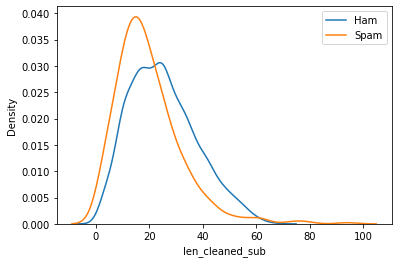

In [210]:
sns.distplot(data[data['label']==0]['len_cleaned_sub'], hist=False,label='Ham')
sns.distplot(data[data['label']==1]['len_cleaned_sub'], hist=False, label='Spam')
plt.legend()

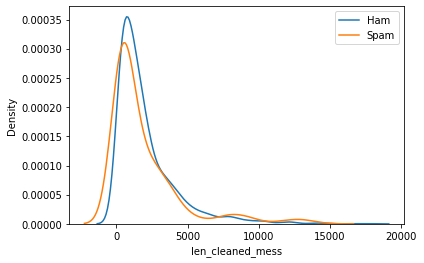

In [211]:
sns.distplot(data[data['label']==0]['len_cleaned_mess'], hist=False,label='Ham')
sns.distplot(data[data['label']==1]['len_cleaned_mess'], hist=False,label='Spam')
plt.legend()

In [212]:
text=data.copy()

In [213]:
# Now, lets first remove unnecessary columns

In [215]:
text.drop(['subject', 'len_subject', 'message', 'len_message'], axis=1, inplace=True)

In [216]:
# Now, lets find the most occuring words in both messages and subject, label_wise

In [217]:
text.head()

label                                   cleaned_sub  len_cleaned_sub  \
0      0            job post apple iss research center               34   
1      0                                    no subject               10   
2      0  query letter frequencies text identification               44   
3      0                                          risk                4   
4      0                      request book information               24   

                                        cleaned_mess  len_cleaned_mess  
0  content length apple iss research center us mi...              1887  
1  lang classification grime joseph barbara grime...              1261  
2  post inquiry sergei atamas satamas umabnet ab ...               879  
3  colleague research differ degrees risk perceiv...               190  
4  earlier morning phone friend mine live south a...               608

In [224]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(text, title = 'Wordcloud'):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 1000,
        max_font_size =15,
        scale = 2,
        random_state = 42
    ).generate(str(text))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

In [222]:
sub_ham=text[text['label']==0]['cleaned_sub'].values
sub_spam=text[text['label']==1]['cleaned_sub'].values

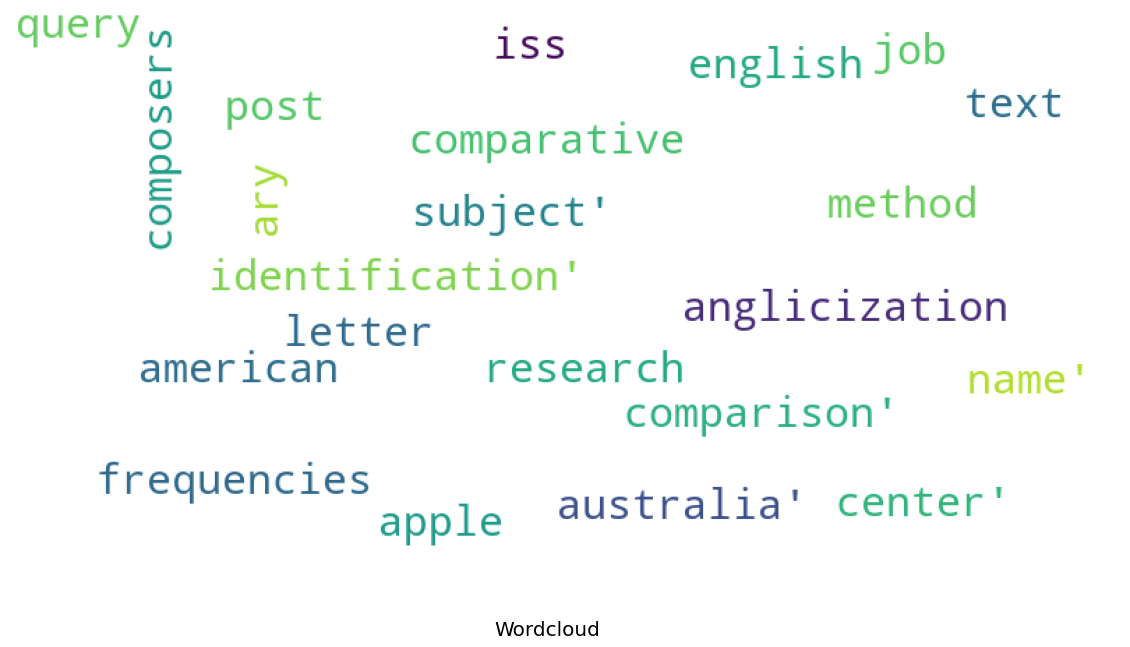

In [225]:
wordcloud(sub_ham)

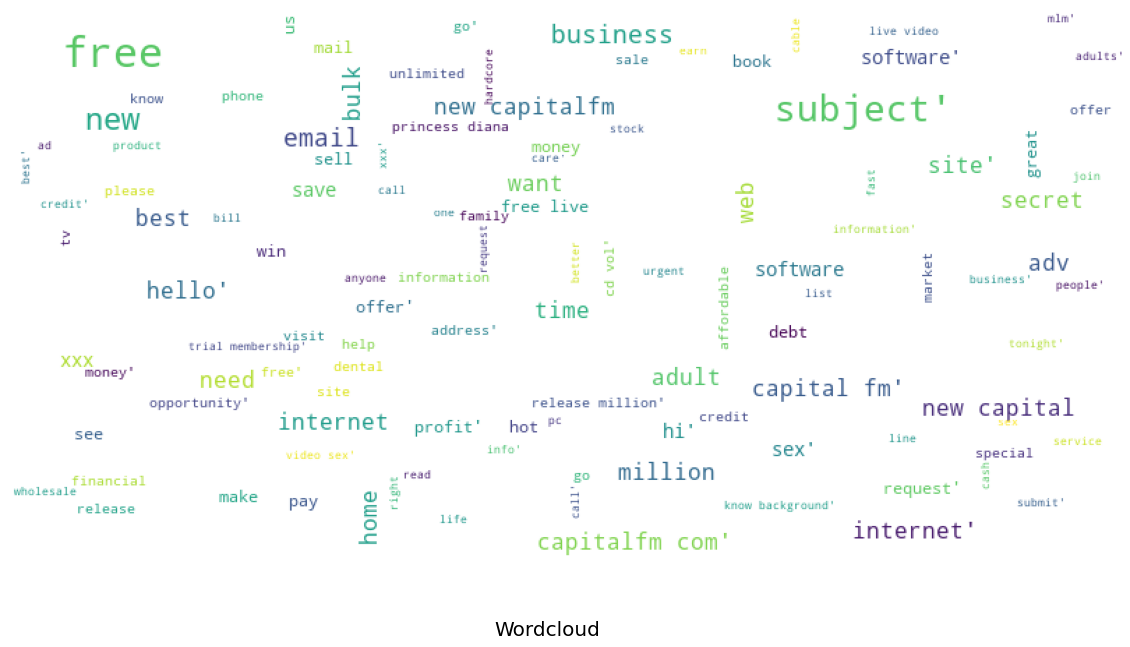

In [226]:
wordcloud(sub_spam)

In [227]:
mess_ham=text[text['label']==0]['cleaned_mess'].values
mess_spam=text[text['label']==1]['cleaned_mess'].values

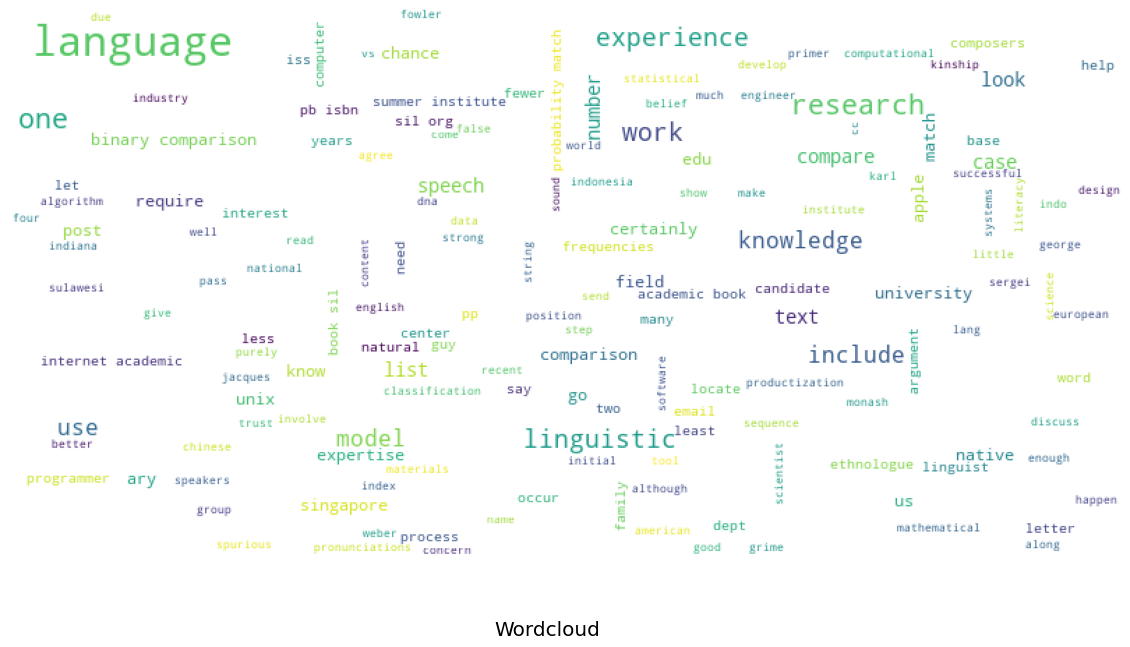

In [228]:
wordcloud(mess_ham)

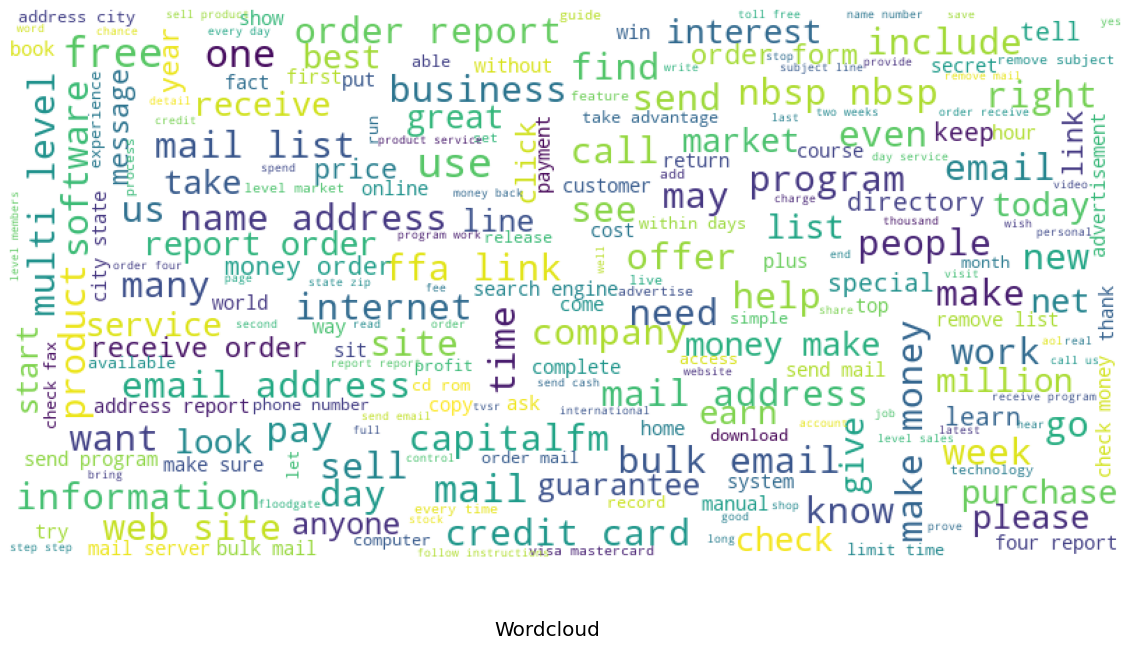

In [229]:
wordcloud(mess_spam)

In [236]:
dict_sub_spam={}
for i in range(len(sub_spam)):
    tokens=word_tokenize(sub_spam[i])
    for token in tokens:
        if token in dict_sub_spam.keys():
            dict_sub_spam[token]+=1
        else:
            dict_sub_spam[token]=1
dict_sub_spam

{'free': 50,
 'internet': 17,
 'success': 2,
 'toolbox': 1,
 'stealth': 1,
 'bulk': 7,
 'email': 15,
 'software': 12,
 'need': 9,
 'money': 9,
 'cable': 3,
 'decsrambler': 1,
 'request': 8,
 'sample': 2,
 'information': 7,
 'best': 12,
 'hey': 3,
 'interest': 2,
 'xxx': 9,
 'site': 11,
 'new': 33,
 'market': 4,
 'technology': 3,
 'beyond': 1,
 'not': 7,
 'want': 7,
 'find': 3,
 'web': 7,
 'gold': 1,
 'mine': 1,
 'webentrepreneurs': 1,
 'million': 8,
 'sweepstakes': 2,
 'dear': 1,
 'website': 1,
 'operator': 1,
 'unique': 2,
 'advertisement': 2,
 'sumiko': 1,
 'ad': 4,
 'date': 1,
 'material': 1,
 'psoriasis': 1,
 'clear': 1,
 'hi': 6,
 'ems': 2,
 'help': 4,
 'make': 6,
 'world': 2,
 'better': 4,
 'place': 1,
 'conformation': 1,
 'viagra': 1,
 'one': 5,
 'affordable': 4,
 'dental': 4,
 'offer': 9,
 'simply': 1,
 'time': 8,
 'financial': 4,
 'freedom': 3,
 'dave': 1,
 'check': 3,
 'please': 4,
 'read': 5,
 'great': 5,
 'business': 16,
 'opportunity': 5,
 'get': 12,
 'right': 3,
 'address

In [243]:
df_sub_spam=pd.DataFrame(dict_sub_spam.keys(), columns=['word'])
df_sub_spam['count']=dict_sub_spam.values()
df_sub_spam.sort_values(by='count', ascending=False)[:20]

word  count
0         free     50
94          no     43
20         new     33
95     subject     29
1     internet     17
66    business     16
6        email     15
15        best     12
108        sex     12
68         get     12
7     software     12
198  capitalfm     11
19        site     11
255        com     11
131    capital     10
132         fm     10
56       offer      9
136    release      9
18         xxx      9
9        money      9

In [245]:
dict_sub_ham={}
for i in range(len(sub_ham)):
    tokens=word_tokenize(sub_ham[i])
    for token in tokens:
        if token in dict_sub_ham.keys():
            dict_sub_ham[token]+=1
        else:
            dict_sub_ham[token]=1

df_sub_ham=pd.DataFrame(dict_sub_ham.keys(), columns=['word'])
df_sub_ham['count']=dict_sub_ham.values()
df_sub_ham.sort_values(by='count', ascending=False)[:50]

word  count
23        linguistics    208
28           language    187
17               call    154
85           workshop    124
105        conference    121
362               new    119
15               book    114
46                sum     95
24              paper     92
6                  no     85
166            syntax     78
7             subject     78
191           summary     76
182         languages     69
58            english     64
0                 job     60
31       announcement     56
8               query     55
478         semantics     51
316            review     45
77        comparative     42
545         phonology     42
150              word     40
106           program     39
352             final     38
83            grammar     38
109        linguistic     38
114              disc     36
121               cfp     36
291     computational     32
65            journal     32
314            method     27
184     international     27
209         discourse     26
34               list     26
367         available     25
37               conf     25
615         cognitive     25
811       acquisition     25
726        pragmatics     25
586         symposium     24
16        information     24
272             study     24
108            german     23
100              ling     23
312          position     23
4            research     23
164         reference     22
267       translation     22
429  sociolinguistics     22

In [248]:
dict_mess_spam={}
for i in range(len(mess_spam)):
    tokens=word_tokenize(mess_spam[i])
    for token in tokens:
        if token in dict_mess_spam.keys():
            dict_mess_spam[token]+=1
        else:
            dict_mess_spam[token]=1

df_mess_spam=pd.DataFrame(dict_mess_spam.keys(), columns=['word'])
df_mess_spam['count']=dict_mess_spam.values()
df_mess_spam.sort_values(by='count', ascending=False)[:50]

word  count
83           mail   1900
39            not   1853
434         order   1635
471        report   1406
107       address   1363
19           make   1213
142         email   1152
366       program   1083
65           send   1060
63            get   1043
154          list    977
24           free    925
206         money    916
328       receive    891
79           name    877
200        people    823
139            no    808
255          time    801
203          work    731
365           one    727
164      business    693
104           com    657
231           use    649
48            new    647
42       internet    631
70           http    607
254        please    600
698   information    584
150         check    545
325        market    518
133            us    502
41           take    485
23            web    473
168          like    464
132          want    462
227          call    461
320        remove    456
62          start    447
438        follow    442
29        service    423
50           also    417
88         letter    409
40           need    404
202          know    396
1437         link    393
191            go    392
453       include    389
610          find    388
246           see    380
833         every    380

In [249]:
dict_mess_ham={}
for i in range(len(mess_ham)):
    tokens=word_tokenize(mess_ham[i])
    for token in tokens:
        if token in dict_mess_ham.keys():
            dict_mess_ham[token]+=1
        else:
            dict_mess_ham[token]=1

df_mess_ham=pd.DataFrame(dict_mess_ham.keys(), columns=['word'])
df_mess_ham['count']=dict_mess_ham.values()
df_mess_ham.sort_values(by='count', ascending=False)[:50]

word  count
16     university   6293
30       language   6256
109           not   4564
418         paper   3802
27    linguistics   3163
1612           de   2831
547    conference   2583
548   information   2571
170     languages   2326
275           use   2313
285           one   2251
32        english   2234
512          mail   2101
264           edu   1924
28        include   1922
310       address   1809
250          word   1799
4        research   1779
420      workshop   1767
696        please   1744
468      abstract   1697
409           may   1676
311          also   1655
150           fax   1627
72           work   1602
891          http   1589
209    linguistic   1507
815         study   1481
93            new   1448
239            no   1446
892           www   1431
49         follow   1418
130          send   1397
188          book   1316
312      interest   1309
809          form   1256
2694           uk   1245
423        theory   1204
98           make   1187
417          call   1170
48            two   1166
333         first   1125
21         speech   1121
234        author   1120
537          page   1120
578          case   1114
31        process   1108
183          name   1106
139        number   1064
337           usa   1062

In [250]:
# making wordclouds of all most frequents

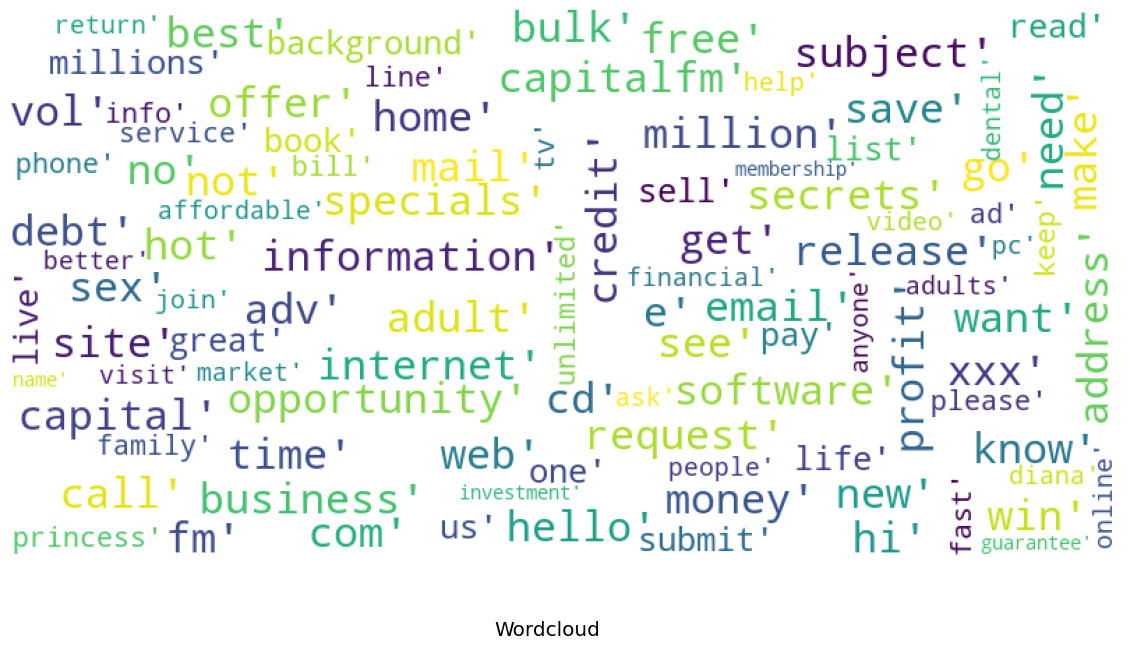

In [253]:
top_sub_spam=df_sub_spam.sort_values(by='count', ascending=False)[:100]['word'].values
wordcloud(top_sub_spam)

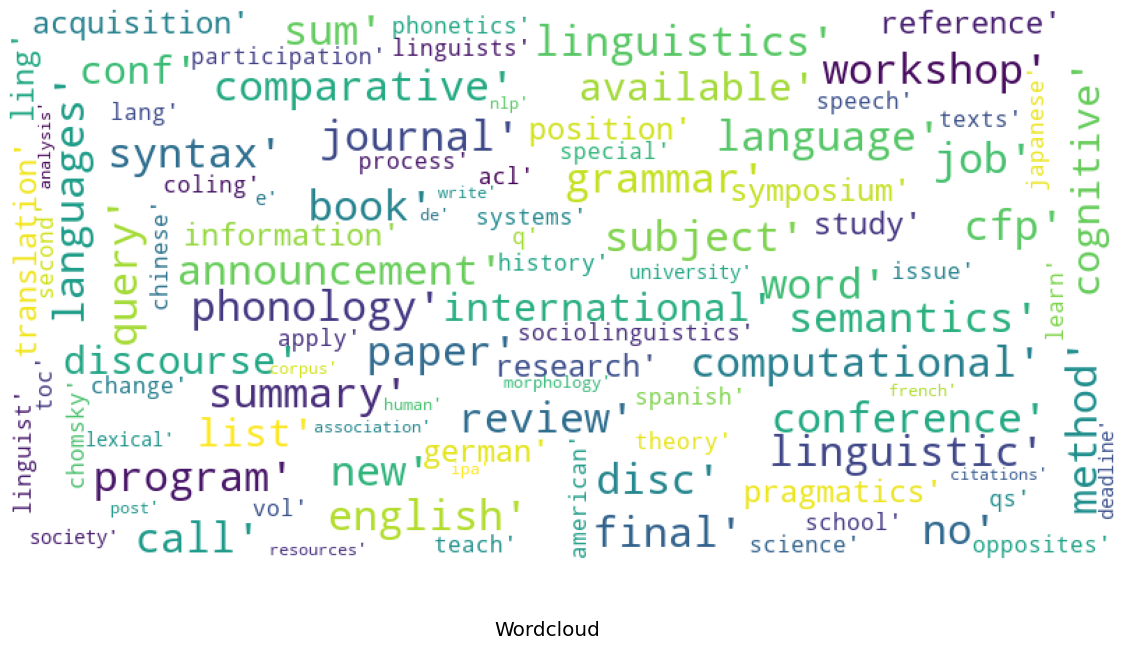

In [254]:
top_sub_ham=df_sub_ham.sort_values(by='count', ascending=False)[:100]['word'].values
wordcloud(top_sub_ham)

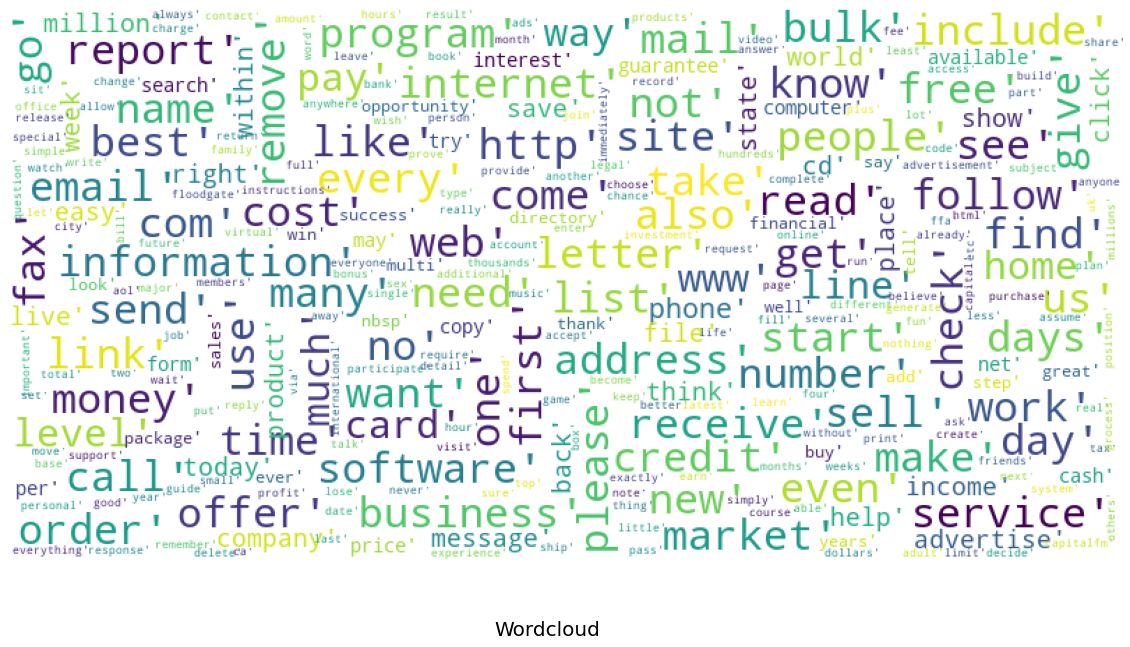

In [255]:
top_mess_spam=df_mess_spam.sort_values(by='count', ascending=False)[:500]['word'].values
wordcloud(top_mess_spam)

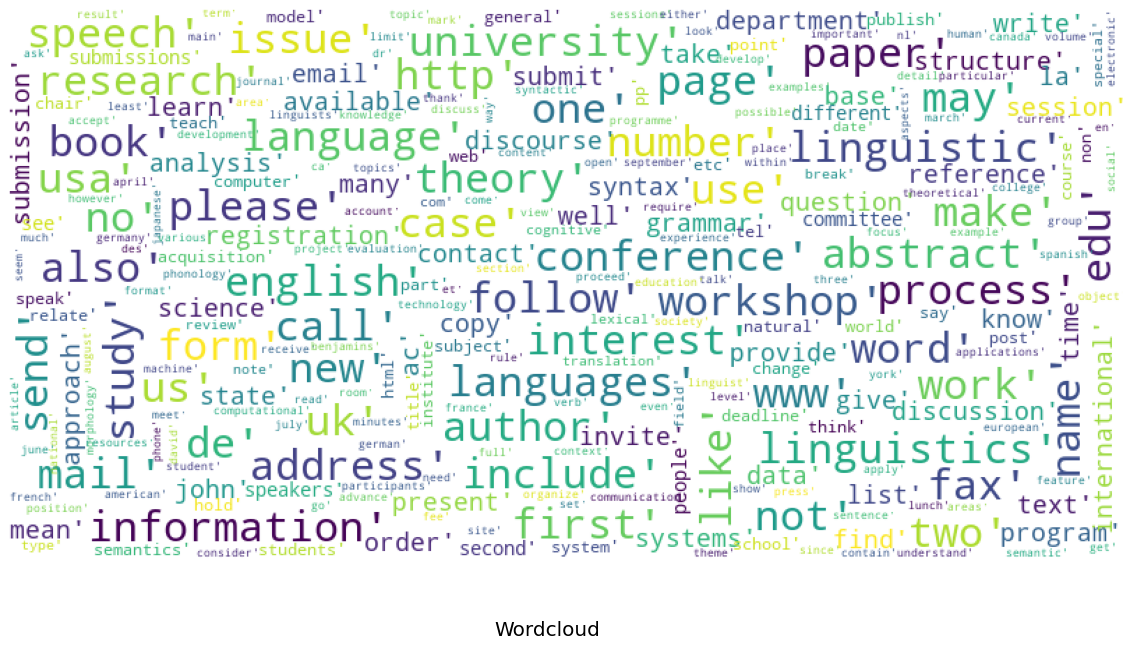

In [256]:
top_mess_ham=df_mess_ham.sort_values(by='count', ascending=False)[:500]['word'].values
wordcloud(top_mess_ham)

# Model Building

## BOW

In [257]:
# Lets use count vectorizer

In [258]:
messages=text['cleaned_mess'].values
subjects=text['cleaned_sub'].values

In [259]:
count=CountVectorizer()
bow_mess=count.fit_transform(messages)
bow_mess_df=pd.DataFrame.sparse.from_spmatrix(bow_mess)
bow_mess_df.columns=count.get_feature_names()
bow_mess_df.shape

(2893, 49152)

In [260]:
count=CountVectorizer()
bow_sub=count.fit_transform(subjects)
bow_sub_df=pd.DataFrame.sparse.from_spmatrix(bow_sub)
bow_sub_df.columns=count.get_feature_names()
bow_sub_df.shape

(2893, 2785)

In [262]:
x=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), bow_sub_df, bow_mess_df],axis=1)
y=text['label']

In [324]:
def get_score(m,x,y):
    x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=45)
    m.fit(x_tr,y_tr)
    train_score=m.score(x_tr,y_tr)
    pred=m.predict(x_te)
    acc=accuracy_score(pred,y_te)
    f=f1_score(pred,y_te)
    conf=confusion_matrix(pred,y_te)
    return train_score,acc,f, conf

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
gnb=GaussianNB()

In [281]:
mnb=MultinomialNB()
get_score(mnb,x,y)

(0.9974070872947277, 0.9930915371329879, 0.9770114942528736)

In [283]:
gnb=GaussianNB()
get_score(gnb,x,y)

(0.7212618841832324, 0.7081174438687392, 0.5072886297376094)

In [272]:
# Multinomial NB is performing very well
# Let's reduce the dimensionality of data

In [322]:
count_mess=CountVectorizer(max_features=2000)
bow_mess=count_mess.fit_transform(messages)
bow_mess_df=pd.DataFrame.sparse.from_spmatrix(bow_mess)
bow_mess_df.columns=count_mess.get_feature_names()
# bow_mess_df.shape

count_sub=CountVectorizer(max_features=200)
bow_sub=count_sub.fit_transform(subjects)
bow_sub_df=pd.DataFrame.sparse.from_spmatrix(bow_sub)
bow_sub_df.columns=count_sub.get_feature_names()
# bow_sub_df.shape

x=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), bow_sub_df, bow_mess_df],axis=1)
y=text['label']

get_score(mnb,x,y)

(0.9891961970613656, 0.9913644214162349, 0.9714285714285714)

In [288]:
# After several iterations, this was the best dimension for the model

In [289]:
# Lets create a model with only subjects

# count_mess=CountVectorizer(max_features=2000)
# bow_mess=count_mess.fit_transform(messages)
# bow_mess_df=pd.DataFrame.sparse.from_spmatrix(bow_mess)
# bow_mess_df.columns=count_mess.get_feature_names()
# bow_mess_df.shape

count_sub=CountVectorizer()
bow_sub=count_sub.fit_transform(subjects)
bow_sub_df=pd.DataFrame.sparse.from_spmatrix(bow_sub)
bow_sub_df.columns=count_sub.get_feature_names()
# bow_sub_df.shape

x_sub=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), bow_sub_df],axis=1)
y_sub=text['label']

get_score(mnb,x_sub,y_sub)

(0.9235090751944685, 0.9067357512953368, 0.578125)

In [290]:
# The F-score is very low

In [291]:
# Lets create a model with only messages

count_mess=CountVectorizer()
bow_mess=count_mess.fit_transform(messages)
bow_mess_df=pd.DataFrame.sparse.from_spmatrix(bow_mess)
bow_mess_df.columns=count_mess.get_feature_names()
# bow_mess_df.shape

# count_sub=CountVectorizer()
# bow_sub=count_sub.fit_transform(subjects)
# bow_sub_df=pd.DataFrame.sparse.from_spmatrix(bow_sub)
# bow_sub_df.columns=count_sub.get_feature_names()
# bow_sub_df.shape

x_mess=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), bow_mess_df],axis=1)
y_mess=text['label']

get_score(mnb,x_mess,y_mess)

(0.9969749351771824, 0.9930915371329879, 0.9770114942528736)

In [295]:
# Lets create a model with only messages

count_mess=CountVectorizer(max_features=2500)
bow_mess=count_mess.fit_transform(messages)
bow_mess_df=pd.DataFrame.sparse.from_spmatrix(bow_mess)
bow_mess_df.columns=count_mess.get_feature_names()
# bow_mess_df.shape

# count_sub=CountVectorizer()
# bow_sub=count_sub.fit_transform(subjects)
# bow_sub_df=pd.DataFrame.sparse.from_spmatrix(bow_sub)
# bow_sub_df.columns=count_sub.get_feature_names()
# bow_sub_df.shape

x_mess=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), bow_mess_df],axis=1)
y_mess=text['label']

get_score(mnb,x_mess,y_mess)

(0.9887640449438202, 0.9913644214162349, 0.9714285714285714)

In [296]:
# The model with 2000 cols of messages plus 200 cols of subjects is still better than 2500 cols of mess only
# We'll go with both subjects and messages where dimensionality is 2200

## TFIDF

In [297]:
tfidf_m=TfidfVectorizer(max_features=2000)
tfidf_mess=tfidf_m.fit_transform(messages)
tfidf_mess_df=pd.DataFrame.sparse.from_spmatrix(tfidf_mess)
tfidf_mess_df.columns=tfidf_m.get_feature_names()
# bow_mess_df.shape

tfidf_s=TfidfVectorizer(max_features=200)
tfidf_sub=tfidf_s.fit_transform(subjects)
tfidf_sub_df=pd.DataFrame.sparse.from_spmatrix(tfidf_sub)
tfidf_sub_df.columns=tfidf_s.get_feature_names()
# bow_sub_df.shape

x=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), tfidf_sub_df, tfidf_mess_df],axis=1)
y=text['label']

get_score(mnb,x,y)

(0.9835782195332757, 0.9844559585492227, 0.9461077844311377)

In [298]:
tfidf_m=TfidfVectorizer()
tfidf_mess=tfidf_m.fit_transform(messages)
tfidf_mess_df=pd.DataFrame.sparse.from_spmatrix(tfidf_mess)
tfidf_mess_df.columns=tfidf_m.get_feature_names()
# bow_mess_df.shape

tfidf_s=TfidfVectorizer()
tfidf_sub=tfidf_s.fit_transform(subjects)
tfidf_sub_df=pd.DataFrame.sparse.from_spmatrix(tfidf_sub)
tfidf_sub_df.columns=tfidf_s.get_feature_names()
# bow_sub_df.shape

x=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), tfidf_sub_df, tfidf_mess_df],axis=1)
y=text['label']

get_score(mnb,x,y)

(0.8353500432152118, 0.853195164075993, 0.0449438202247191)

In [299]:
tfidf_m=TfidfVectorizer(max_features=5000)
tfidf_mess=tfidf_m.fit_transform(messages)
tfidf_mess_df=pd.DataFrame.sparse.from_spmatrix(tfidf_mess)
tfidf_mess_df.columns=tfidf_m.get_feature_names()
# bow_mess_df.shape

tfidf_s=TfidfVectorizer(max_features=500)
tfidf_sub=tfidf_s.fit_transform(subjects)
tfidf_sub_df=pd.DataFrame.sparse.from_spmatrix(tfidf_sub)
tfidf_sub_df.columns=tfidf_s.get_feature_names()
# bow_sub_df.shape

x=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), tfidf_sub_df, tfidf_mess_df],axis=1)
y=text['label']

get_score(mnb,x,y)

(0.9520311149524633, 0.9516407599309153, 0.8133333333333334)

In [300]:
# BOW is performing better than TFIDF

## Word2Vec

In [301]:
list_mess=[]
for sentance in messages:
    list_mess.append(sentance.split())

w2v_m=Word2Vec(list_mess,size=50, workers=4)
w2v_words_mess = list(w2v_m.wv.vocab)
vector_mess = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_mess): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_mess:
            vec = w2v_m.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_mess.append(sent_vec)
print(len(vector_mess))
print(len(vector_mess[0]))


list_sub=[]
for sentance in subjects:
    list_sub.append(sentance.split())

w2v_s=Word2Vec(list_mess,size=5, workers=4)
w2v_words_sub = list(w2v_s.wv.vocab)
vector_sub = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_sub): # for each review/sentence
    sent_vec = np.zeros(5) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_sub:
            vec = w2v_s.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_sub.append(sent_vec)
print(len(vector_sub))
print(len(vector_sub[0]))

100%|██████████| 2893/2893 [01:34<00:00, 30.46it/s]


2893
50


100%|██████████| 2893/2893 [00:01<00:00, 2161.08it/s]

2893
5


In [304]:
word_vec_mess=pd.DataFrame(vector_mess)
word_vec_sub=pd.DataFrame(vector_sub)

xw2v=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), word_vec_sub, word_vec_mess],axis=1)
yw2v=text['label']

print(get_score(gnb,xw2v,yw2v))

lr=LogisticRegression(n_jobs=-1, random_state=45)
print(get_score(lr,xw2v,yw2v))

(0.9727744165946414, 0.9740932642487047, 0.9189189189189189)
(0.9818496110630942, 0.9861830742659758, 0.9529411764705883)


In [305]:
# list_mess=[]
# for sentance in messages:
#     list_mess.append(sentance.split())

w2v_m=Word2Vec(list_mess,size=25, workers=4)
w2v_words_mess = list(w2v_m.wv.vocab)
vector_mess = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_mess): # for each review/sentence
    sent_vec = np.zeros(25) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_mess:
            vec = w2v_m.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_mess.append(sent_vec)
print(len(vector_mess))
print(len(vector_mess[0]))


# list_sub=[]
# for sentance in subjects:
#     list_sub.append(sentance.split())

w2v_s=Word2Vec(list_mess,size=3, workers=4)
w2v_words_sub = list(w2v_s.wv.vocab)
vector_sub = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_sub): # for each review/sentence
    sent_vec = np.zeros(3) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_sub:
            vec = w2v_s.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_sub.append(sent_vec)
print(len(vector_sub))
print(len(vector_sub[0]))

word_vec_mess=pd.DataFrame(vector_mess)
word_vec_sub=pd.DataFrame(vector_sub)

xw2v=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), word_vec_sub, word_vec_mess],axis=1)
yw2v=text['label']

print(get_score(gnb,xw2v,yw2v))

lr=LogisticRegression(n_jobs=-1, random_state=45)
print(get_score(lr,xw2v,yw2v))

100%|██████████| 2893/2893 [01:34<00:00, 30.49it/s]


2893
25


100%|██████████| 2893/2893 [00:01<00:00, 2365.44it/s]


2893
3
(0.9775280898876404, 0.9844559585492227, 0.9497206703910613)
(0.9891961970613656, 0.9896373056994818, 0.9659090909090908)


In [311]:
# list_mess=[]
# for sentance in messages:
#     list_mess.append(sentance.split())

w2v_m=Word2Vec(list_mess,size=20, workers=4)
w2v_words_mess = list(w2v_m.wv.vocab)
vector_mess = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_mess): # for each review/sentence
    sent_vec = np.zeros(20) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_mess:
            vec = w2v_m.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_mess.append(sent_vec)
print(len(vector_mess))
print(len(vector_mess[0]))


# list_sub=[]
# for sentance in subjects:
#     list_sub.append(sentance.split())

w2v_s=Word2Vec(list_mess,size=3, workers=4)
w2v_words_sub = list(w2v_s.wv.vocab)
vector_sub = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_sub): # for each review/sentence
    sent_vec = np.zeros(3) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_sub:
            vec = w2v_s.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_sub.append(sent_vec)
print(len(vector_sub))
print(len(vector_sub[0]))

word_vec_mess=pd.DataFrame(vector_mess)
word_vec_sub=pd.DataFrame(vector_sub)

xw2v=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), word_vec_sub, word_vec_mess],axis=1)
yw2v=text['label']

print(get_score(gnb,xw2v,yw2v))

lr=LogisticRegression(n_jobs=-1, random_state=45)
print(get_score(lr,xw2v,yw2v))

100%|██████████| 2893/2893 [00:01<00:00, 2380.58it/s]


2893
3
(0.9745030250648228, 0.9827288428324698, 0.9444444444444445)
(0.9887640449438202, 0.9896373056994818, 0.9659090909090908)


In [314]:
# list_mess=[]
# for sentance in messages:
#     list_mess.append(sentance.split())

w2v_m=Word2Vec(list_mess,size=17, workers=4)
w2v_words_mess = list(w2v_m.wv.vocab)
vector_mess = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_mess): # for each review/sentence
    sent_vec = np.zeros(17) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_mess:
            vec = w2v_m.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_mess.append(sent_vec)
print(len(vector_mess))
print(len(vector_mess[0]))


# list_sub=[]
# for sentance in subjects:
#     list_sub.append(sentance.split())

w2v_s=Word2Vec(list_mess,size=3, workers=4)
w2v_words_sub = list(w2v_s.wv.vocab)
vector_sub = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_sub): # for each review/sentence
    sent_vec = np.zeros(3) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_sub:
            vec = w2v_s.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_sub.append(sent_vec)
print(len(vector_sub))
print(len(vector_sub[0]))

word_vec_mess=pd.DataFrame(vector_mess)
word_vec_sub=pd.DataFrame(vector_sub)

xw2v=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), word_vec_sub, word_vec_mess],axis=1)
yw2v=text['label']

print(get_score(gnb,xw2v,yw2v))

lr=LogisticRegression(n_jobs=-1, random_state=45)
print(get_score(lr,xw2v,yw2v))

100%|██████████| 2893/2893 [01:32<00:00, 31.44it/s]


2893
17


100%|██████████| 2893/2893 [00:01<00:00, 1505.77it/s]


2893
3
(0.9745030250648228, 0.9861830742659758, 0.9550561797752809)
(0.9814174589455489, 0.9913644214162349, 0.9714285714285714)


In [313]:
# list_mess=[]
# for sentance in messages:
#     list_mess.append(sentance.split())

w2v_m=Word2Vec(list_mess,size=15, workers=4)
w2v_words_mess = list(w2v_m.wv.vocab)
vector_mess = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_mess): # for each review/sentence
    sent_vec = np.zeros(15) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_mess:
            vec = w2v_m.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_mess.append(sent_vec)
print(len(vector_mess))
print(len(vector_mess[0]))


# list_sub=[]
# for sentance in subjects:
#     list_sub.append(sentance.split())

w2v_s=Word2Vec(list_mess,size=3, workers=4)
w2v_words_sub = list(w2v_s.wv.vocab)
vector_sub = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_sub): # for each review/sentence
    sent_vec = np.zeros(3) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_sub:
            vec = w2v_s.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_sub.append(sent_vec)
print(len(vector_sub))
print(len(vector_sub[0]))

word_vec_mess=pd.DataFrame(vector_mess)
word_vec_sub=pd.DataFrame(vector_sub)

xw2v=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), word_vec_sub, word_vec_mess],axis=1)
yw2v=text['label']

print(get_score(gnb,xw2v,yw2v))

lr=LogisticRegression(n_jobs=-1, random_state=45)
print(get_score(lr,xw2v,yw2v))

100%|██████████| 2893/2893 [01:22<00:00, 35.00it/s]


2893
15


100%|██████████| 2893/2893 [00:01<00:00, 2546.93it/s]

2893
3
(0.9706136560069144, 0.9827288428324698, 0.9444444444444445)


(0.9857389801210026, 0.9913644214162349, 0.9710982658959537)


In [315]:
# The dimensionality of 17+3 is the best

In [316]:
# Lets try RandomForest and XGBoost on this dataset

In [319]:
# list_mess=[]
# for sentance in messages:
#     list_mess.append(sentance.split())

w2v_m=Word2Vec(list_mess,size=17, workers=4)
w2v_words_mess = list(w2v_m.wv.vocab)
vector_mess = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_mess): # for each review/sentence
    sent_vec = np.zeros(17) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_mess:
            vec = w2v_m.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_mess.append(sent_vec)
print(len(vector_mess))
print(len(vector_mess[0]))


# list_sub=[]
# for sentance in subjects:
#     list_sub.append(sentance.split())

w2v_s=Word2Vec(list_mess,size=3, workers=4)
w2v_words_sub = list(w2v_s.wv.vocab)
vector_sub = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_sub): # for each review/sentence
    sent_vec = np.zeros(3) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_sub:
            vec = w2v_s.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    vector_sub.append(sent_vec)
print(len(vector_sub))
print(len(vector_sub[0]))

word_vec_mess=pd.DataFrame(vector_mess)
word_vec_sub=pd.DataFrame(vector_sub, columns=['a','b','c'])

xw2v=pd.concat([text.drop(['cleaned_sub','cleaned_mess','label'], axis=1), word_vec_sub, word_vec_mess],axis=1)
yw2v=text['label']

print(get_score(gnb,xw2v,yw2v))

lr=LogisticRegression(n_jobs=-1, random_state=45)
print(get_score(lr,xw2v,yw2v))

(0.9745030250648228, 0.9861830742659758, 0.9550561797752809)
(0.9814174589455489, 0.9913644214162349, 0.9714285714285714)


In [320]:
rf=RandomForestClassifier(n_jobs=-1, random_state=45)
xgb=XGBClassifier(n_jobs=-1, random_state=45)

print(get_score(rf,xw2v,yw2v))
print(get_score(xgb,xw2v,yw2v))

(1.0, 0.9896373056994818, 0.9655172413793104)
(1.0, 0.9861830742659758, 0.9545454545454545)


In [321]:
# Tree based models are over-fitting.
# Also, Lr and MNB are performing better

# Final Model

In [325]:
train_score,acc,f, conf=get_score(lr,x,y)
print(train_score)
print(acc)
print(f)
print(conf)

1.0
0.9913644214162349
0.9714285714285714
[[489   2]
 [  3  85]]


In [326]:
train_score,acc,f, conf=get_score(mnb,x,y)
print(train_score)
print(acc)
print(f)
print(conf)

0.9891961970613656
0.9913644214162349
0.9714285714285714
[[489   2]
 [  3  85]]


In [327]:
train_score,acc,f, conf=get_score(lr,xw2v,yw2v)
print(train_score)
print(acc)
print(f)
print(conf)

0.9814174589455489
0.9913644214162349
0.9714285714285714
[[489   2]
 [  3  85]]


In [328]:
# We'll use LR with 17+3 features

In [329]:
# Let's create auc_roc curve

In [337]:
from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=5,scoring='f1')
    gkb.fit(x,y)
    return gkb.best_params_

In [339]:
x_train,x_te,y_train,y_te=train_test_split(xw2v,yw2v,test_size=0.20,random_state=40,stratify=y)

param={'C':[0.5,1,2,10,15,17,20,22,25]}
gridcv(lr,param,x_train,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.2s finished


{'C': 20}

In [340]:
lrc=LogisticRegression(C=20, n_jobs=-1, random_state=45)
lrc.fit(x_train, y_train)
pred=lrc.predict(x_te)
f=f1_score(pred,y_te)
conf=confusion_matrix(pred,y_te)

print(f)
print(conf)

0.9319371727748692
[[477   7]
 [  6  89]]


In [341]:
# The default model was better

In [342]:
# Lets make ROC_AUC

0.9655172413793104
[[489   3]
 [  3  84]]


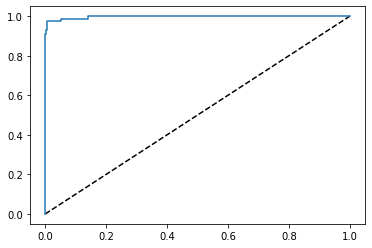

In [346]:
x_train,x_te,y_train,y_te=train_test_split(xw2v,yw2v,test_size=0.2,random_state=45)
lr.fit(x_train, y_train)
pred=lrc.predict(x_te)
f=f1_score(pred,y_te)
conf=confusion_matrix(pred,y_te)
print(f)
print(conf)

y_pred_pro=lr.predict_proba(x_te)[:,1]
fpr,tpr,threshold=roc_curve(y_te,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='GBC')
plt.show()